In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

- En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

In [2]:
df = pd.read_csv('/mnt/d/Adalab/ejercicios-de-adalab/modulo-2/2-pandas-mod-2/files/attacks_pandas_VII.csv', index_col = 0)

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [5]:
plt.rcParams["figure.figsize"] = (10,8)


2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [6]:
categoricas = df.select_dtypes(include = "object")
categoricas.head()

,case_number,type,country,area,location,activity,name,age,time,species_,injury,month,fatal,gender
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,18h00,White shark,"No injury to occupant, outrigger canoe and pad...",Jun,n,F
1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,11,14h00 -15h00,NaN,Minor injury to left thigh,Jun,n,F
2,2018.06.09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48,07h45,NaN,Injury to left lower leg from surfboard skeg,Jun,n,M
3,2018.06.08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,NaN,NaN,2 m shark,Minor injury to lower leg,Jun,n,M
4,2018.06.04,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,NaN,NaN,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,Jun,n,M


In [7]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,year
0,2018.0
1,2018.0
2,2018.0
3,2018.0
4,2018.0


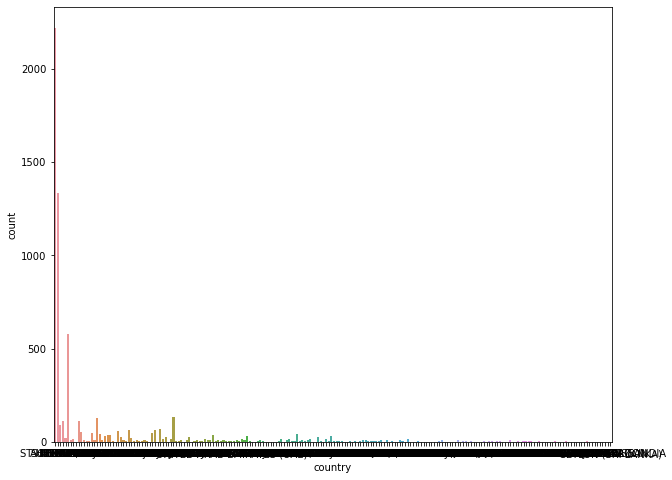

In [8]:
# 2 variables categoricas, utilizamos countplot
sns.countplot(x = 'country', data = df);

In [3]:
# no e puede identificar los países, intentamos con los 10 países con más ataques utilizando categoricas.iloc[:10]
países_10 = df['country'].value_counts().iloc[:10]
países_10 

USA                 2222
AUSTRALIA           1335
SOUTH AFRICA         577
PAPUA NEW GUINEA     134
NEW ZEALAND          127
BRAZIL               112
BAHAMAS              109
MEXICO                88
ITALY                 70
FIJI                  62
Name: country, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'AUSTRALIA'),
  Text(2, 0, 'SOUTH AFRICA'),
  Text(3, 0, 'PAPUA NEW GUINEA'),
  Text(4, 0, 'NEW ZEALAND'),
  Text(5, 0, 'BRAZIL'),
  Text(6, 0, 'BAHAMAS'),
  Text(7, 0, 'MEXICO'),
  Text(8, 0, 'ITALY'),
  Text(9, 0, 'FIJI')])

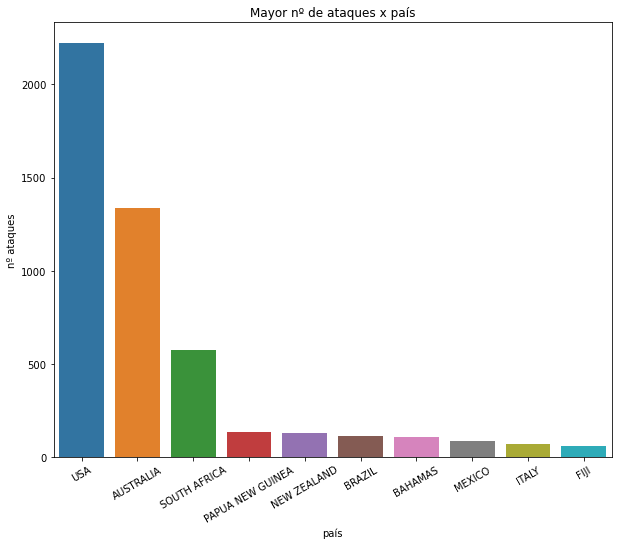

In [6]:
fig = sns.countplot(x = 'country' , order = países_10.index, data = df)
plt.title('Mayor nº de ataques x país')
fig.set(xlabel = 'país', ylabel = 'nº ataques')
# rotacion... nos falta
plt.xticks(rotation = 30)

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'AUSTRALIA'),
  Text(2, 0, 'SOUTH AFRICA'),
  Text(3, 0, 'PAPUA NEW GUINEA'),
  Text(4, 0, 'NEW ZEALAND'),
  Text(5, 0, 'BRAZIL'),
  Text(6, 0, 'BAHAMAS'),
  Text(7, 0, 'MEXICO'),
  Text(8, 0, 'ITALY'),
  Text(9, 0, 'FIJI')])

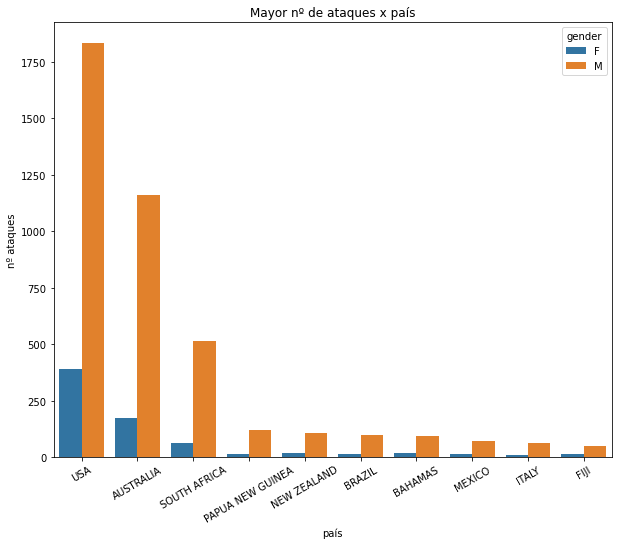

In [11]:
# repetimos el grafico anterior añadindo el hue = gender
fig = sns.countplot(x = 'country' , order = países_10.index, data = df, hue = 'gender')
plt.title('Mayor nº de ataques x país')
fig.set(xlabel = 'país', ylabel = 'nº ataques')
# rotacion... nos falta
plt.xticks(rotation = 30)

In [12]:
# Vemos que es comun a todos ataques en los 10 países con mais alto nº de ataques que las victimas sean hombres,
# con una grande diferencia en relación a las mujeres.

 - ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [8]:
df_copy = df.copy()

In [9]:
df_copy['age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', 'Â\xa0 ', ' ', '30 or 36', '6Â½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',


In [34]:
# definimos 10 intervalos 
ages = np.arange(1, 100, 10)
df_copy['age_bins'] = pd.cut(x = df_copy['age'], bins = ages)

TypeError: '<' not supported between instances of 'int' and 'str'